In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

## Simulate from Class

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

In [4]:
y = simulation

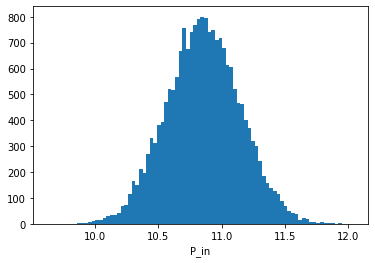

In [5]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

In [6]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]

## Model Selection Methods

### Chi-Square

In [7]:
from helper_functions import compute_chi_square

results = compute_chi_square(simulation)

Distribution: weibull_min || Parameters: (533102816.67082655, -266555837.11416727, 266555848.05581123)|| Log-likelihood: -9551.525112029925

Distribution: norm || Parameters: (10.856260930361984, 0.2919045002438211)|| Log-likelihood: -3750.4432647796893

Distribution: weibull_max || Parameters: (4.492720792453061, 12.042258498181576, 1.2981617109046732)|| Log-likelihood: -3863.9892527628754

Distribution: beta || Parameters: (364.87933577547363, 431.3367243552041, 3.2758077228036275, 16.54157441896509)|| Log-likelihood: -3750.184186586095

Distribution: invgauss || Parameters: (0.01745673667969885, 8.555723145276737, 131.5246715064353)|| Log-likelihood: -4005.8950871677225

Distribution: uniform || Parameters: (9.63191571754346, 2.4018382549794683)|| Log-likelihood: -17522.935206165694

Distribution: gamma || Parameters: (28532.084433159544, -38.45065752075047, 0.0017281219025688426)|| Log-likelihood: -3750.2047227090734

Distribution: expon || Parameters: (9.63191571754346, 1.22434521

In [8]:
results.to_csv('Data/MLE_table.csv',header=None, index=None)

In [9]:
params_gamma = results.iloc[2]['Parameters']
params_beta = results.iloc[1]['Parameters']
params_normal = results.iloc[0]['Parameters']
params_uniform = results.iloc[9]['Parameters']
params_lognorm = results.iloc[4]['Parameters']
params_expon = results.iloc[10]['Parameters']

### Plots

In [10]:
import seaborn as sns
simulation.sort()

**Normal plot**

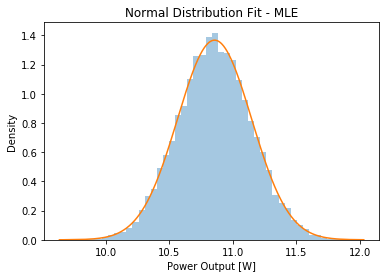

In [11]:
normal_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
normal_fit.set_title('Normal Distribution Fit - MLE')
normal_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Normal.png')

**Gamma plot**

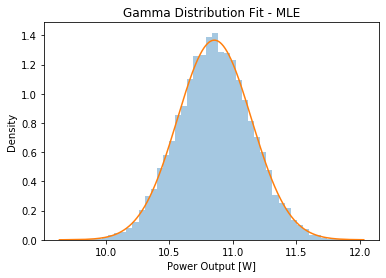

In [12]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MLE')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Gamma.png')

**Beta plot**

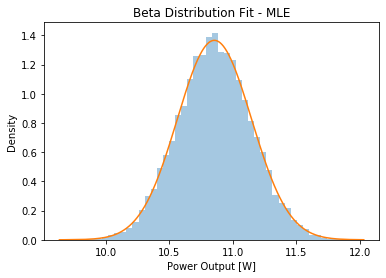

In [13]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MLE')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Beta.png')

**Lognormal plot**

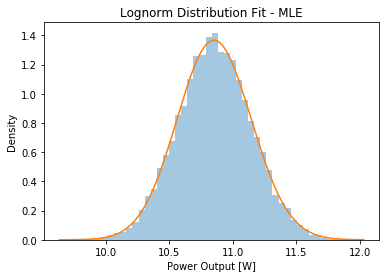

In [14]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MLE')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Lognorm.png')

**Exponential plot**

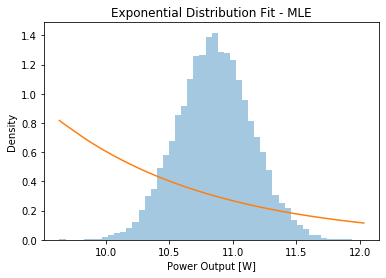

In [15]:
expon_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.expon.pdf(simulation, *params_expon))
expon_fit.set_title('Exponential Distribution Fit - MLE')
expon_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_expon.png')

**Tail Plot**

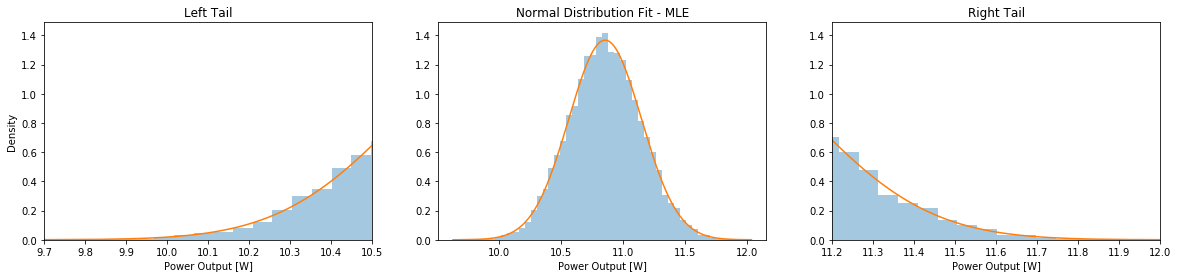

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
# Central Plot - Full Distribution
normal_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax2)
ax2.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
normal_fit.set_title('Normal Distribution Fit - MLE')

# Left Plot - Left Tail
left_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax1)
ax1.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
left_tail.set_title('Left Tail')
left_tail.set_ylabel('Density')
ax1.set_xlim([9.7, 10.5])

# Right Plot - Right Tail
right_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax3)
ax3.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
right_tail.set_title('Right Tail')
ax3.set_xlim([11.2, 12])
plt.savefig('Data/Plots/MLE_normal.png')
plt.show()

### Non-Nested Likelihood Ratio Test

Compare **Model A** to **Model B** and choose the best fit. 

**Model A:** Normal Distribution

**Model B:** Beta Distribution

In [17]:
n_sim = 20000 

In [18]:
from helper_functions import LRT

In [19]:
# Normal vs. Beta
p_value = LRT(results, 1000, 20000)
p_value

C:\Users\oriol\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\oriol\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


0.62

### Q-Q Plot

Compare **Model A** to **Model B** on a quantile-quantile plot. 

In [20]:
from helper_functions import qqplot

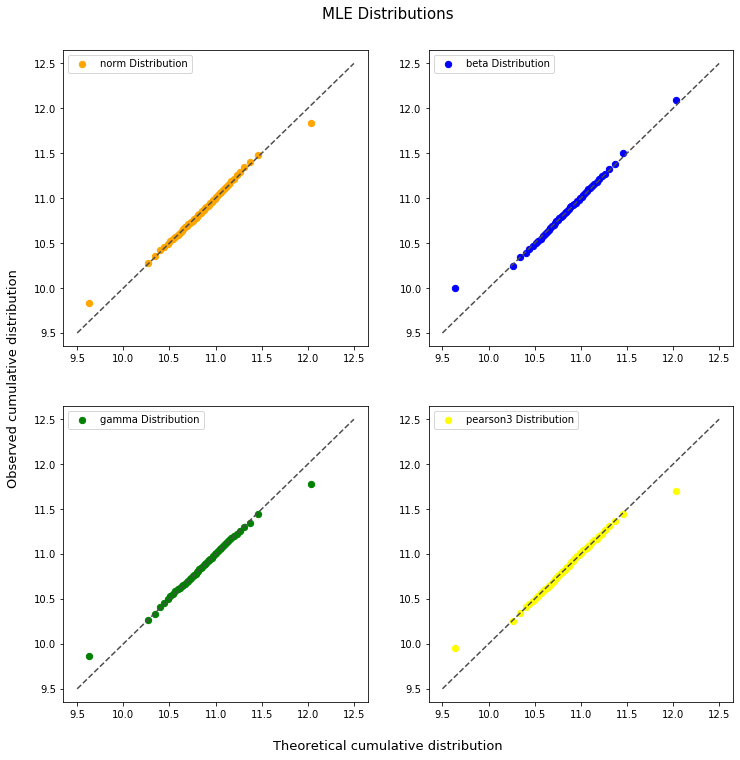

In [21]:
qqplot(simulation, results, 4,"MLE Distributions", "MLE_qq")

### Delta Method

In [22]:
from math import erf
from helper_functions import delta_method

In [25]:
variance_array = np.zeros(30)
mean_array = np.zeros(30)
for i in range(2,31):
    mean_array[i-1], variance_array[i-1] = delta_method(12.669, np.random.choice(y, 30))

mean = np.mean(mean_array[2:]) # Mean -> Probability of finding an observation larger than 12.669
mean = 1 - mean

std = np.mean(variance_array[2:])**0.5 # Standard error
variance = np.mean(variance_array[2:]) # Variance


params = (mean, std)
params

(2.0493717278746715e-08, 1.654847526711336e-08)

In [28]:
test_data = scipy.stats.norm.rvs(mean, std, 1000)
test_data.sort()

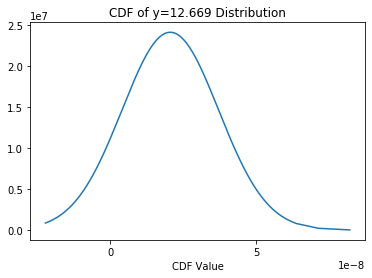

In [30]:
plt.plot(test_data, scipy.stats.norm.pdf(test_data, *params))
plt.title('CDF of y=12.669 Distribution')
plt.xlabel('CDF Value')
plt.locator_params(axis='x', nbins=4)
plt.savefig('Data/Plots/DM_12669.png')
plt.show()

## Validation Methods

### Kolmogorov-Smirnoff 2 Sample Test

In [31]:
from scipy.stats import ks_2samp

In [32]:
data2 = scipy.stats.norm.rvs(*params_normal, size = 2000)
statistic, pvalue = ks_2samp(simulation,data2)
print(f"The Statistic value is: {statistic} \nThe p_value is: {pvalue}")

The Statistic value is: 0.018549999999999983 
The p_value is: 0.5588943060696208


In [33]:
n1 = len(simulation)
n2 = len(data2)
alpha = 0.05
c_alpha = 1.36 # https://sparky.rice.edu//astr360/kstest.pdf
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

0.031894827166799325

In [34]:
if statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

The two samples come from same distributions


## Work Within Limits

### Quantiles

In [37]:
quantiles = scipy.stats.norm.ppf([0.000001, 0.5, 0.999999], *params_normal)

**Improvement**

In [38]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]
print(f'min: {limit_min}\nMax: {limit_MAX}\n')
(limit_MAX-limit_min)/limit_MAX
percent = ((quantiles[2]-quantiles[0])-(quantiles[2]-quantiles[1]))/limit_MAX*100

print(f'{percent}% narrower')

min: 9.285923059194744
Max: 12.669757924403362

10.951637399805493% narrower


### Cp

In [39]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

In [44]:
# This value depends on the best distribution
sigma = params_normal[1]

#Cp computation
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp

1.9320444770933523